<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2022-07-24 14:18:57--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.5’

m4_survey_data.sqli 100%[===================>]  34.98M  45.1MB/s    in 0.8s    

2022-07-24 14:18:59 (45.1 MB/s) - ‘m4_survey_data.sqlite.5’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

In [3]:
conn

Import pandas module.


In [4]:
import pandas as pd
import numpy as np
import matplotlib 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Demo: How to run an sql query


In [5]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""


# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)

df.head()


,COUNT(*)
0,11398


In [7]:
df.to_csv("m4_survey_data.csv",index=False)

## Demo: How to list all tables


In [6]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [42]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""

pd.read_sql_query(QUERY,conn)


,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [8]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
df = pd.read_sql("SELECT * FROM master", conn)
df



,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
0,0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,22.0,No,No,Appropriate in length,Easy
1,1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,...,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,23.0,No,No,Appropriate in length,Neither easy nor difficult
2,2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Somewhat more welcome now than last year,28.0,No,Yes,Appropriate in length,Easy
3,3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,26.0,No,No,Appropriate in length,Neither easy nor difficult
4,4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,A few times per week,"No, I didn't know that Stack Overflow had a jo...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,29.0,No,No,Appropriate in length,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11393,11393,25136,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,None,"No, I knew that Stack Overflow had a job board...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,36.0,No,No,Appropriate in length,Difficult
11394,11394,25137,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Poland,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are",Neutral,A lot more welcome now than last year,25.0,No,No,Appropriate in length,Neither easy nor difficult
11395,11395,25138,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,I have never participated in Q&A on Stack Over...,Yes,"No, I've heard of them, but I am not part of a...",Neutral,A lot more welcome now than last year,34.0,No,Yes,Too long,Easy
11396,11396,25141,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of LOWER quality than prop...",Employed full-time,Switzerland,No,"Secondary school (e.g. American high school, G...",...,Daily or almost daily,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Somewhat less welcome now than last year,25.0,No,No,Appropriate in length,Easy


# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [36]:
print(df['ConvertedComp'])

0         61000.0
1         95179.0
2         90000.0
3        455352.0
4         65277.0
           ...   
11393    130000.0
11394     19880.0
11395    105000.0
11396     80371.0
11397         NaN
Name: ConvertedComp, Length: 11398, dtype: float64


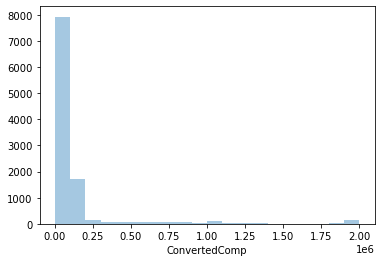

In [47]:
# your code goes here

ax = sns.distplot(a=  df['ConvertedComp'], bins = 20 , hist = True , kde = False ) 

### Box Plots


Plot a box plot of `Age.`


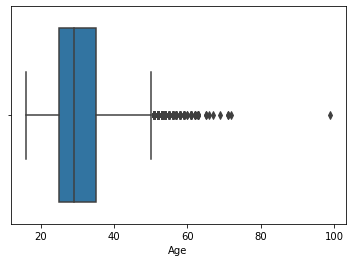

In [49]:
# your code goes here

ax = sns.boxplot(df['Age'] )

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


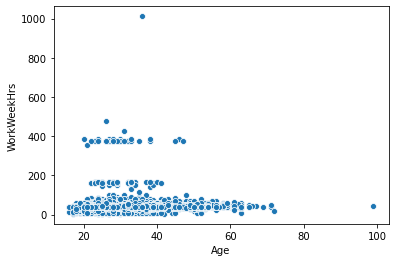

In [51]:
# your code goes here

ax = sns.scatterplot( df['Age'] , df['WorkWeekHrs'])

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


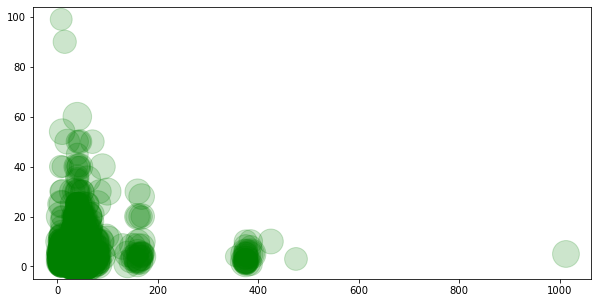

In [84]:
# your code goes here


plt.figure(figsize=(10,5))
plt.scatter(x=df.WorkWeekHrs, y=df.CodeRevHrs, c='green', alpha=0.2, s=df.Age*20)
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [80]:
# your code goes here
df2 = pd.read_sql("SELECT * FROM DatabaseWorkedWith", conn)


In [96]:
df2.groupby("DatabaseWorkedWith").count()
y = pd.DataFrame(df2.groupby("DatabaseWorkedWith").count())
y.sort_values(by="Respondent", ascending=False)
y = y.nlargest(5,"Respondent")
y

,Respondent
DatabaseWorkedWith,
MySQL,5469
Microsoft SQL Server,4110
PostgreSQL,4097
SQLite,3248
MongoDB,3016


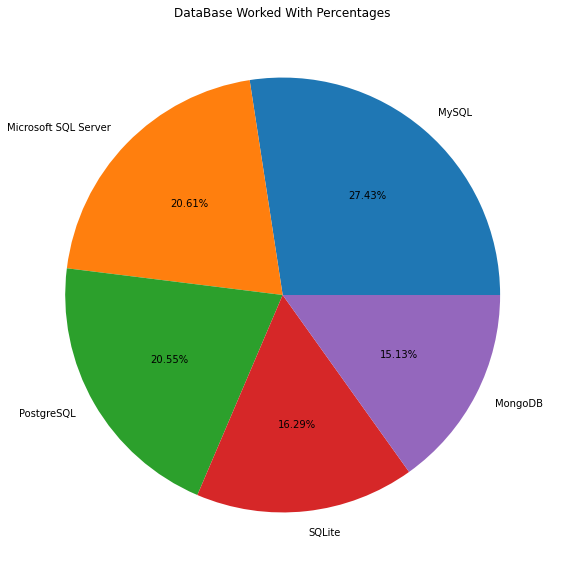

In [97]:
plt.figure(figsize=(10,10))
plt.pie(y.Respondent, labels=['MySQL','Microsoft SQL Server','PostgreSQL','SQLite','MongoDB'],
       autopct='%.2f%%')
plt.title("DataBase Worked With Percentages")
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [98]:
# your code goes here

a = df['WorkWeekHrs'].median()
a

40.0

In [99]:
b = df['CodeRevHrs'].median()
b

4.0

In [100]:
age = df[ ( df['Age'] >=30) & ( df[ 'Age'] <=35)]
age


,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
5,5,19,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Brazil,No,Some college/university study without earning ...,...,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a job board...","No, I've heard of them, but I am not part of a...",Neutral,Just as welcome now as I felt last year,31.0,No,Yes,Too long,Easy
11,11,26,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,Some college/university study without earning ...,...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Just as welcome now as I felt last year,34.0,No,No,Appropriate in length,Easy
12,12,29,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,I have never participated in Q&A on Stack Over...,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Just as welcome now as I felt last year,32.0,No,Yes,Appropriate in length,Easy
18,18,49,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,Serbia,"Yes, full-time",Some college/university study without earning ...,...,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, I've heard of them, but I am not part of a...","No, not really",Just as welcome now as I felt last year,34.0,No,Yes,Too long,Easy
22,22,56,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,China,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","No, not at all",Just as welcome now as I felt last year,33.0,No,Yes,Appropriate in length,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11385,11385,25120,I am a developer by profession,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Argentina,"Yes, part-time","Bachelor’s degree (BA, BS, B.Eng., etc.)",...,I have never participated in Q&A on Stack Over...,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,32.0,No,No,Too long,Neither easy nor difficult
11391,11391,25133,I am a developer by profession,No,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,Belgium,"Yes, full-time","Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,"No, I didn't know that Stack Overflow had a jo...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,32.0,No,Yes,Too long,Easy
11392,11392,25134,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ecuador,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...","No, not really",Somewhat less welcome now than last year,32.0,No,No,Appropriate in length,Easy
11395,11395,25138,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,I have never participated in Q&A on Stack Over...,Yes,"No, I've heard of them, but I am not part of a...",Neutral,A l

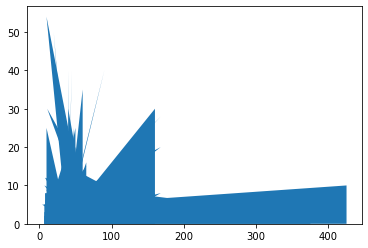

In [101]:
plt.stackplot( age.WorkWeekHrs ,age.CodeRevHrs)
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [11]:
# your code goes here
a = df['ConvertedComp'].median()
a




57745.0

In [12]:
age = df[( df['Age'] >=45) & (df['Age']<=60)]
age

,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
7,7,22,I am a developer by profession,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,Some college/university study without earning ...,...,A few times per week,Yes,"No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,47.0,No,Yes,Appropriate in length,Easy
50,50,111,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,A few times per week,"No, I knew that Stack Overflow had a job board...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Somewhat less welcome now than last year,54.0,No,Yes,Too long,Easy
66,66,144,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed part-time,Germany,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, I've heard of them, but I am not part of a...","No, not really",Somewhat less welcome now than last year,47.0,No,Yes,Too long,Easy
75,75,164,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,Less than once per month or monthly,Yes,"No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,47.0,No,Yes,Appropriate in length,Easy
93,93,202,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,Canada,No,Some college/university study without earning ...,...,Multiple times per day,"No, I knew that Stack Overflow had a job board...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,45.0,No,No,Appropriate in length,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11342,11342,25016,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Canada,No,Associate degree,...,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a job board...","No, I've heard of them, but I am not part of a...","No, not really",Just as welcome now as I felt last year,45.0,No,Yes,Appropriate in length,Easy
11345,11345,25022,"I am not primarily a developer, but I write co...",Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Canada,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,A few times per week,"No, I knew that Stack Overflow had a job board...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,46.0,No,Yes,Appropriate in length,Easy
11350,11350,25036,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,A few times per week,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,48.0,No,No,Too long,Neither easy nor difficult
11372,11372,25091,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Other doctoral degree (Ph.D, Ed.D., etc.)",...,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,50.0,No,No,Appropriate in length,Easy


In [14]:
age

,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
7,7,22,I am a developer by profession,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,Some college/university study without earning ...,...,A few times per week,Yes,"No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,47.0,No,Yes,Appropriate in length,Easy
50,50,111,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,A few times per week,"No, I knew that Stack Overflow had a job board...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Somewhat less welcome now than last year,54.0,No,Yes,Too long,Easy
66,66,144,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed part-time,Germany,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, I've heard of them, but I am not part of a...","No, not really",Somewhat less welcome now than last year,47.0,No,Yes,Too long,Easy
75,75,164,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,Less than once per month or monthly,Yes,"No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,47.0,No,Yes,Appropriate in length,Easy
93,93,202,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,Canada,No,Some college/university study without earning ...,...,Multiple times per day,"No, I knew that Stack Overflow had a job board...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,45.0,No,No,Appropriate in length,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11342,11342,25016,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Canada,No,Associate degree,...,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a job board...","No, I've heard of them, but I am not part of a...","No, not really",Just as welcome now as I felt last year,45.0,No,Yes,Appropriate in length,Easy
11345,11345,25022,"I am not primarily a developer, but I write co...",Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Canada,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,A few times per week,"No, I knew that Stack Overflow had a job board...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,46.0,No,Yes,Appropriate in length,Easy
11350,11350,25036,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,A few times per week,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,48.0,No,No,Too long,Neither easy nor difficult
11372,11372,25091,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Other doctoral degree (Ph.D, Ed.D., etc.)",...,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,50.0,No,No,Appropriate in length,Easy


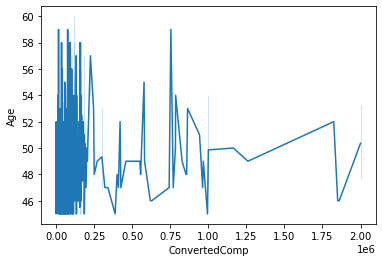

In [15]:

x = sns.lineplot(x=age.ConvertedComp,y=age.Age)

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


AttributeError: 'AxesSubplot' object has no attribute 'show'

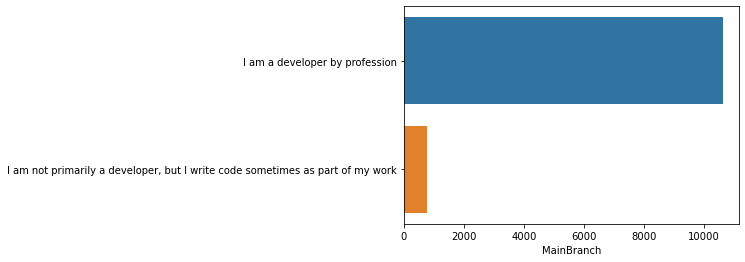

In [130]:
# your code goes here
df2 = pd.read_sql("SELECT * FROM master", conn)
df2.columns
df.MainBranch.index = df.MainBranch.index.map(int)

z = pd.DataFrame(df.MainBranch.value_counts())
z
x = sns.barplot( y = z.index , x = z.MainBranch)



Close the database connection.


In [131]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
